<h1 style='text-align:center'> Analysis of historical data on game sales and popularity of game consoles.</h1>

#### Project description<br>
> You work for the on-line store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns. In front of you is data going back to 2016. Let's imagine that it's December 2016 and you're planning a campaign for 2017. (The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.) The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.<br>

#### Goal<br>
To identify patterns that determine whether a game succeeds or not what will allow to spot potential big winners and plan advertising campaigns for the next year.

#### Description of the data

— `Name`<br>
— `Platform`<br>
— `Year_of_Release`<br>
— `Genre`<br>
— `NA_sales (North American sales in USD million)`<br>
— `EU_sales (sales in Europe in USD million)`<br>
— `JP_sales (sales in Japan in USD million)`<br>
— `Other_sales (sales in other countries in USD million)`<br>
— `Critic_Score (maximum of 100)`<br>
— `User_Score (maximum of 10)`<br>
— `Rating (ESRB)`<br>

#### Table of Contents
#### Step 1.
- [Open the data file and study the general information.](#Access)
- [Dealing with missing values.](#NaN)

#### Step 2. Prepare the data for analysis
- [Look at how many games were released in different years. Is the data for every period significant?](#number-of-games)
- [Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?](#sales-varied)
- [Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.Work only with the data that you've decided is relevant. Disregard the data for previous years.Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.](#prognosis-for-2017)
- [Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.](#box-plot-for-the-global-sales)
- [Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.](#reviews-affect-sales)
- [Keeping your conclusions in mind, compare the sales of the same games on other platforms.](#compare-the-sales)
- [Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?](#general-distribution-of-games)

#### Step 3. Create a user profile for each region
For each region (NA, EU, JP), determine:
- [The top five platforms. Describe variations in their market shares from region to region.](#top-five-platforms)
- [The top five genres. Explain the difference.](#top-five-genres)
- [Do ESRB ratings affect sales in individual regions?](#ESRB-ratings)

#### Step 4. Test the following hypotheses:
- [Average user ratings of the Xbox One and PC platforms are the same.](#Average-user-ratings)
- [Average user ratings for the Action and Sports genres are different.](#Action-and-Sports-genres)

#### Step 5. Write a general conclusion
- [Conclusion.](#conclusion)

<a id='Access'></a>

#### "Open the data file and study the general information"

In [78]:
# importing all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats as st
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

# reading the file
data = pd.read_csv('games.csv')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [80]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [81]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [82]:
# lowercasing all column names for more comfortable using
data.columns = data.columns.str.lower()

In [83]:
data.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [84]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [85]:
# From the beginning I want the column with total sales numbers
data['total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

Now it's time to have a look at missing values.

In [86]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [87]:
missing_values_table(data)

Your selected dataframe has 12 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
critic_score,8578,51.3
rating,6766,40.5
user_score,6701,40.1
year_of_release,269,1.6
name,2,0.0
genre,2,0.0


<a id='NaN'></a>

#### Dealing with missing values
1) 2 NaN values in 'name' column and 'genre' column are the same rows - I drop them, since it's only two rows and they also contain NaN in critical for us columns like columns with scores and sales.<br>

2) We have many 0.00 values in sales columns: 'na_sales' - 4508, 'eu_sales' - 5870, 'jp_sales' - 10514, 'other_sales' - 6601.
Some of them may be real missing numbers and some of them not coincidentally 0.00. That can be that games were not sold in some countries or sold in  miserable amounts (>0,1). Plus, in Japan sales there are 10514 out of 16715 zero values, what makes impossible to impute them. So I leave these zeros.<br>

3) 'year_of_release' - 269 NaN. I found (what's kind obvious) some connection between 'year of  release' and 'platform'. Different platforms were released in different years, respectively games were released specially for the platforms that were popular in these specific years. So here I use transform method to impute NaNs.<br>

4) 'user_score' 6699 NaN + 2424 "tbd" values + one '0' value ~ 55% of all the data. With such a large amount of missing values, there is no way to replace them without distorting the data. So I'll perform the analysis on the rest of 45%. And 'tbd' I'll replace with NaN, because for our analysis the meaning is the same - unknown value. And I need this column to be numeric. <br>

5) 'critic_score' ~ 51% NaN values in column. Also can't replace them. We'll work with what we have.<br>

For both score columns I thought about applying transform method, but I can't find any relation to other parameters. Ported games are not so rare have different rating, so we can't  use 'platform' and "name' columns. 'genre' also differs from console to console and from one time period to another. <br>

6) 'rating' 6764 NaN + 3 "RP" values what means "Rating pending" ~ 40% of data. It's better not to replace missing values if they are more than 25%.<br>

7) We also have 2 rows with NaN in all scoring columns and '0' in all sales columns. There is no sense for our investigation to keep them.<br>

And what concerns to reasons why we have so much missing values, I looked at all the columns in the aggregate, I saw several options:<br>
a)  NaN in both score and rating columns with big 'total_sales' (above 20) - there 'year_of_release' is mainly between 80th-90th. Apparently these games were older than ratings.<br>
b)  NaN in both score and rating columns with 'year_of_release' after 2000 - there we have not null value only in one of the sales columns and it's "0.01". So probably the game was so unpopular that there weren't enough players to rate it. Or even rating firms did not include this game on their list.<br>
c) Of course, there are cases that do not fit any of the above descriptions, but nevertheless, the majority of NaNs coincide in all rating columns together.

In [88]:
data.dropna(subset=['name'], inplace=True)
data.reset_index(drop=True, inplace=True)
#TRANSFORM METHOD 
data['year_of_release'].fillna(data.groupby('platform')['year_of_release'].transform('mean'),inplace=True)

In [89]:
# Changing data types for right outputs of transfom method and because year can not be float
data['year_of_release'] = data['year_of_release'].astype('int')

# Changing 'tbd' to NaN and transforming column to float type
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype(float)

# Changing 'RP' to NaN in 'rating' column since it stands for "rating pending"
data['rating'] = data['rating'].replace('RP', np.nan)

# Changing 'K-A' to 'E' in 'rating' column since it's Kids-Adults, the old rating that was changed later to 'E'- Everyone
# Also all titles with 'EC' - Early childhood rating are already replaced with the 'E' rating
data['rating'] = data['rating'].replace(['K-A', 'EC'], 'E')

In [90]:
# In this and next cell I check if Transform method works properly by looking at the rows where NaN in 'year_of_release' were.
# It gives or exact year of release or +-2 years, which I suppose pretty precise result
data.iloc[[183]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24


In [91]:
data.iloc[[16371]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16371,PDC World Championship Darts 2008,PSP,2008,Sports,0.01,0.0,0.0,0.0,43.0,NaN,E10+,0.01


In [92]:
# finding rows with no sales and ratings
data[data.total_sales == 0.0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16674,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16707,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


In [93]:
# dropping 2 rows with no useful information for us
data.drop(data.index[16707], inplace=True)
data.drop(data.index[16674], inplace=True)
data.reset_index(drop=True, inplace=True)

In [94]:
# recently we didn't see statistics of  our main column, now it's time :)
data.total_sales.describe()

count    16711.000000
mean         0.533379
std          1.548364
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

<a id='number-of-games'></a>

#### "Look at how many games were released in different years. Is the data for every period significant?"

In [95]:
df = data[['year_of_release', 'name']].groupby('year_of_release').count().sort_values(by='year_of_release').reset_index()
df

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


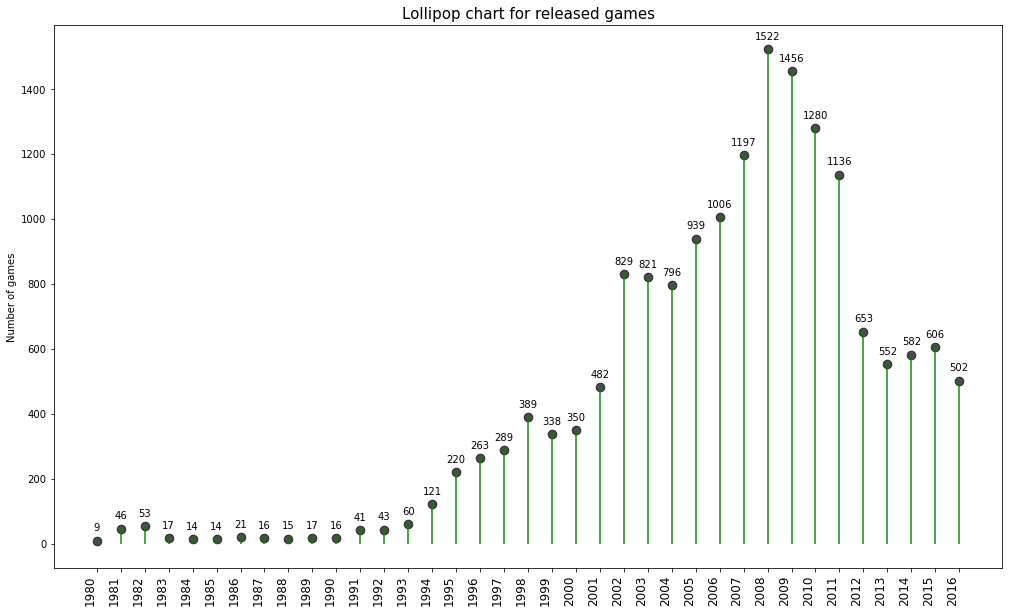

In [96]:
# creating empty "container" for our chart
fig, ax = plt.subplots(figsize=(17,10))
# filling "container" with vertical lines
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='green', alpha=0.7, linewidth=2);
# creating dots for lollipops
ax.scatter(x=df.year_of_release, y=df.name, s=75, color='black', alpha=0.7);


#setting labels and title
ax.set_title('Lollipop chart for released games', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation=90, fontdict={'horizontalalignment':'right', 'size':12});

#setting labels for each dot
for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name, 2), fontdict={'horizontalalignment':'center', 'size':10})

In 2002-2011 period the number of released games far exceeds other years. It is interesting to check what is the reason for it.<br>
Ok, I checked, It was 'era' of the most popular platform ever - PS2.<br>
The second question is: why do we see exponential growth in 1993-1994-1995? <br>
Later, we'll see that one of the reasons is popular GEN and GB platforms.

<a id='sales-varied'></a>

#### "Look at how sales varied from platform to platform."

In [97]:
top_sales=data.groupby('platform')['total_sales'].agg(['count', 'mean', 'sum']).sort_values(by='sum', ascending=False).reset_index()
top_sales

,platform,count,mean,sum
0,PS2,2160,0.581375,1255.77
1,X360,1262,0.769746,971.42
2,PS3,1330,0.706504,939.65
3,Wii,1320,0.687508,907.51
4,DS,2151,0.374765,806.12
5,PS,1197,0.610576,730.86
6,GBA,822,0.386679,317.85
7,PS4,392,0.801378,314.14
8,PSP,1209,0.243218,294.05
9,PC,974,0.266448,259.52


Most of all the games were released for PS2	- 2160, but most profitable is GB and nearly the same NES. May be because games cost for PS2 was not so high?<br>
Let's take a look how far are the sales of each platform from the mean in terms of std using z-value

In [98]:
top_sales['z_sales'] = (top_sales['sum'] - top_sales['sum'].mean())/top_sales['sum'].std()
top_sales['colors'] = ['red' if x < 0 else 'green' for x in top_sales.z_sales]
#top_sales.head()

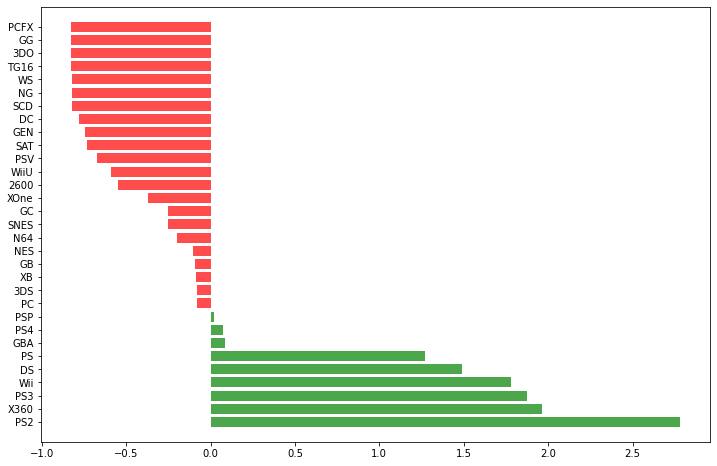

In [99]:
plt.figure(figsize=(12,8))
plt.hlines(y=top_sales.platform, xmin=0, xmax=top_sales.z_sales, 
           colors=top_sales.colors, linewidth=10, alpha=0.7)
plt.show()

So here we have successful platforms colored <span style="color:green">green</span> and less succesful platforms colored <span style="color:red">red</span>. The leaders are **PS2**, **X360**, **PS3**

#### "Choose the platforms with the greatest total sales and build a distribution based on data for each year."

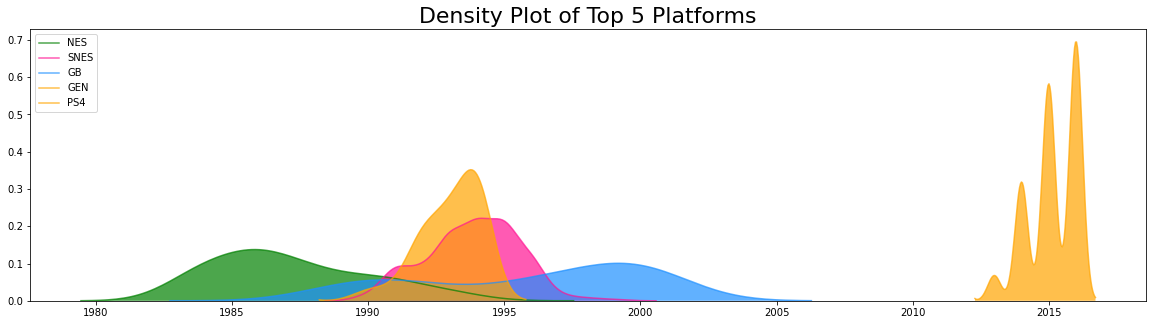

In [100]:
# Draw Plot
plt.figure(figsize=(20,5))
sns.kdeplot(data.loc[data['platform'] == "NES", 'year_of_release'], shade=True, color="g", label="NES", alpha=.7)
sns.kdeplot(data.loc[data['platform'] == "SNES", 'year_of_release'], shade=True, color="deeppink", label="SNES", alpha=.7)
sns.kdeplot(data.loc[data['platform'] == "GB", 'year_of_release'], shade=True, color="dodgerblue", label="GB", alpha=.7)
sns.kdeplot(data.loc[data['platform'] == "GEN", 'year_of_release'], shade=True, color="orange", label="GEN", alpha=.7)
sns.kdeplot(data.loc[data['platform'] == "PS4", 'year_of_release'], shade=True, color="orange", label="PS4", alpha=.7)

# Decoration
plt.title('Density Plot of Top 5 Platforms', fontsize=22)
#plt.xticks(data.year_of_release[::1])
plt.legend()
plt.show()

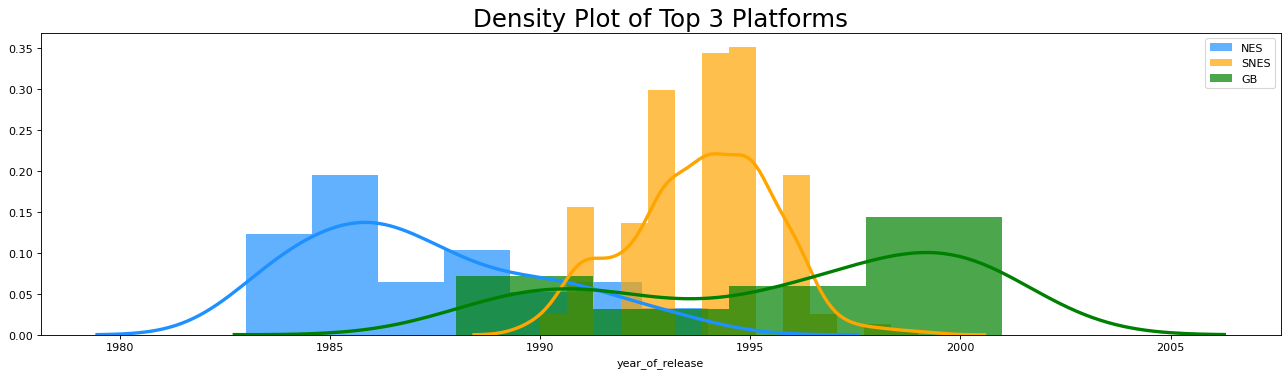

In [101]:
# Draw Plot
plt.figure(figsize=(20,5), dpi= 80)
sns.distplot(data.loc[data['platform'] == "NES", 'year_of_release'], 
             color="dodgerblue", label="NES", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(data.loc[data['platform'] == "SNES", 'year_of_release'], color="orange", label="SNES",
             hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(data.loc[data['platform'] == "GB", 'year_of_release'], color="g", label="GB",
             hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

# Decoration
plt.title('Density Plot of Top 3 Platforms', fontsize=22)
plt.legend()
plt.show()

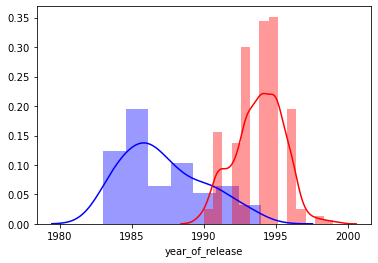

In [102]:
nes_platform = data.query('platform == "NES"')
#histogram
sns.distplot(nes_platform['year_of_release'], label = 'NES', color = 'b');

snes_platform = data.query('platform == "SNES"')
#histogram
sns.distplot(snes_platform['year_of_release'], label = 'SNES', color = 'r');

For NES platforms I used one histogram. Due to this histogram we can answer the question: "How long does it generally take for new platforms to appear and old ones to fade?" - approximately 10 years. 
This conclusion is confirmed by the following graphs of the most profitable platforms, 	except GEN.

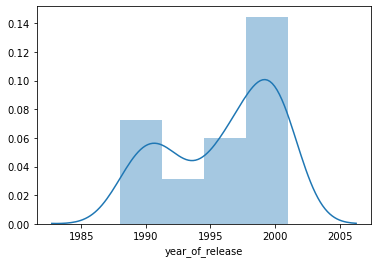

In [103]:
gb_platform = data.query('platform == "GB"')
#histogram
sns.distplot(gb_platform['year_of_release'], label = 'GB');

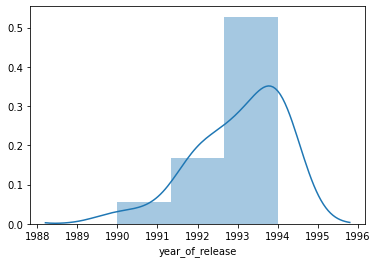

In [104]:
gen_platform = data.query('platform == "GEN"')
#histogram
sns.distplot(gen_platform['year_of_release'], label = 'GEN');

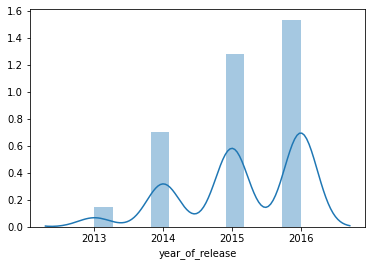

In [105]:
ps4_platform = data.query('platform == "PS4"')
#histogram
sns.distplot(ps4_platform['year_of_release'], label = 'PS4');

#### "Find platforms that used to be popular but now have zero sales." 

Almost all of them: GEN, GB, NES, SNES. And PS4 are on its peak or nearly.

<a id='prognosis-for-2017'></a>

####  "Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017. Work only with the data that you've decided is relevant. Disregard the data for previous years.  Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms."

As we saw, platforms in general are popular for ~10 years. So we need to find platforms approximately 4-5 years old before the peak of its popularity with a growing sales to predict potentially profitable platforms for 2017.

In [106]:
# getting rid of data from previous years
new_data = data[data.year_of_release >= 2012]

In [107]:
# finding relatively new platforms
data.groupby('platform')['year_of_release'].median().sort_values()

platform
2600    1982.0
NES     1986.5
GG      1992.0
GEN     1993.0
SNES    1994.0
SCD     1994.0
NG      1994.5
3DO     1995.0
TG16    1995.0
SAT     1996.0
PCFX    1996.0
GB      1997.0
PS      1998.0
N64     1999.0
WS      2000.0
DC      2000.0
GBA     2003.0
GC      2003.0
XB      2004.0
PS2     2004.0
DS      2008.0
Wii     2009.0
PC      2009.0
PSP     2009.0
X360    2010.0
PS3     2011.0
3DS     2013.0
WiiU    2013.0
PSV     2014.0
PS4     2015.0
XOne    2015.0
Name: year_of_release, dtype: float64

Here we found our pontentional winners for next year :) PSV, XOne and PS4 are suitable for us in age.

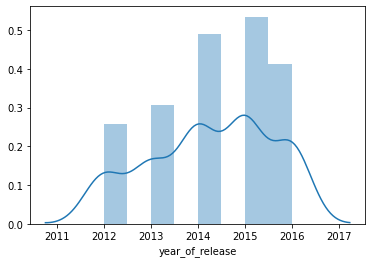

In [108]:
PSV_platform = new_data.query('platform == "PSV"')
#histogram
sns.distplot(PSV_platform['year_of_release'], label = 'PSV');

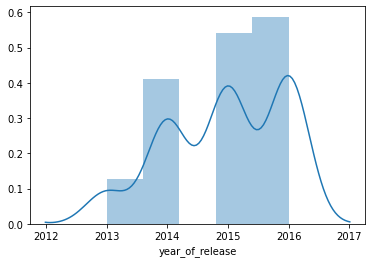

In [109]:
XOne_platform = new_data.query('platform == "XOne"')
#histogram
sns.distplot(XOne_platform['year_of_release'], label = 'XOne');

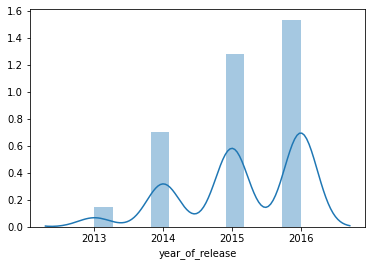

In [110]:
# we already plotted it but make it one more time :)
PS4_platform = new_data.query('platform == "PS4"')
#histogram
sns.distplot(PS4_platform['year_of_release'], label = 'PS4');

PSV sales are already shrinking. Hence platforms that we need are XOne and PS4, considering the success of previous models of X-Box and Play Station. As well PS4 is already one of the most profitable platforms ever.

<a id='box-plot-for-the-global-sales'></a>

#### "Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings."

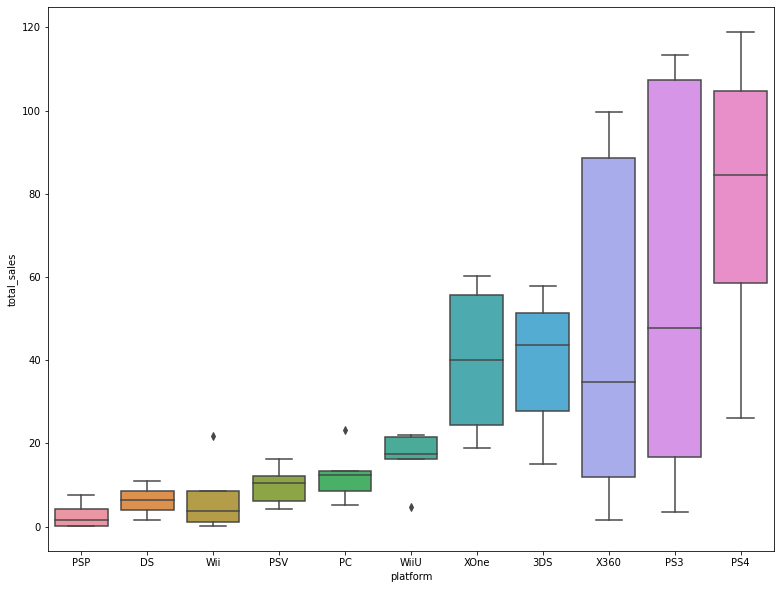

In [111]:
# creating data set with needed information
grouped = new_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
# creating order for box plots 
ordered = grouped.groupby('platform')['total_sales'].sum().sort_values().reset_index()['platform']

plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=grouped, order=ordered);

Now we see the most successful platforms on the right. X360 and PS3 have a big boxes and comparatively short whiskers. And median of PS4 is the highest among new platforms, and in particular above XOne, which we've previously choosen as potentially profitable platform.


<a id='reviews-affect-sales'></a>

#### "Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions."

My choice is PS3. I don't want to take most profitable platforms GB and NES, cause they are too old, and some things have changed since than. Also PS4 (next generation of PS3) is one of two consoles that we suppose will be most profitable and popular in 2017, so I want to have a better look at its forerunner.

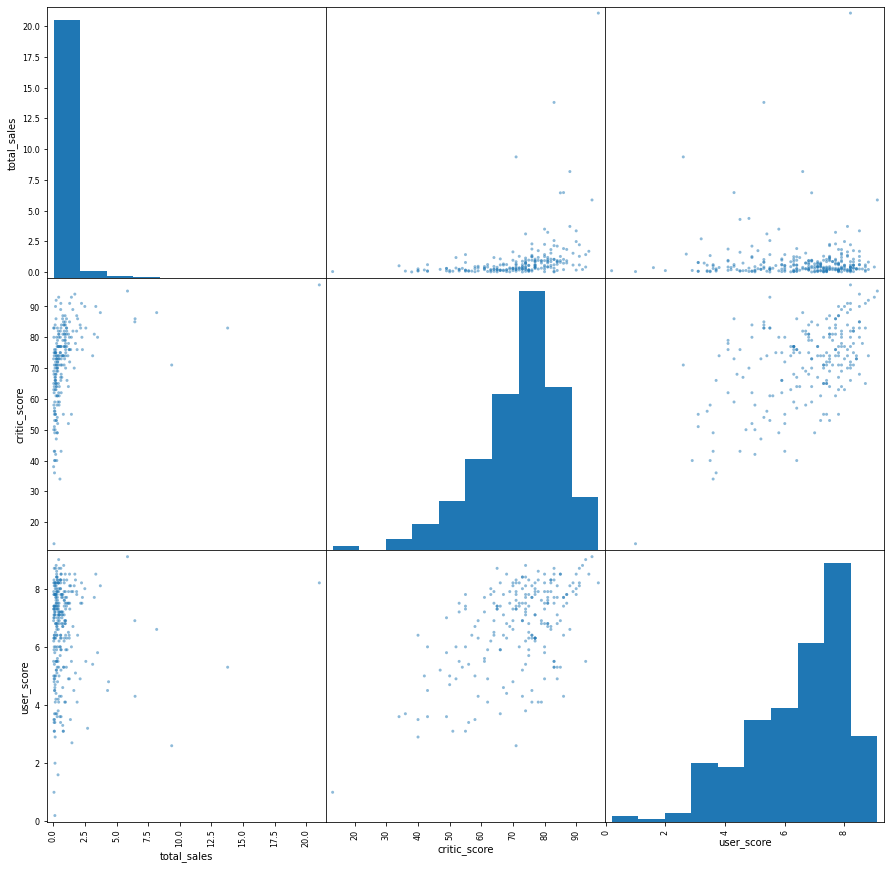

In [112]:
# building a scatter plot 
ps3_corr = new_data.query('platform == "PS3"')
ps3_corr = ps3_corr[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(ps3_corr, figsize=(15,15), grid=True);

,total_sales,critic_score,user_score
total_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


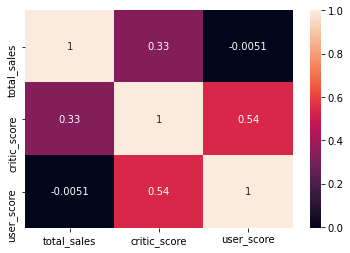

In [113]:
# calculating the correlation between reviews and sales
corrMatrix = ps3_corr.corr()
sn.heatmap(corrMatrix, annot=True)
ps3_corr.corr()

There is no strong correlation between reviews and sales. I think we can explain it by the fact that in the years of PS3 popularity the rating system was not yet so developed (I read that user ratings generally appeared closer to 2010). Accordingly, in those days, ratings did not affect sales.

<a id='compare-the-sales'></a>

#### "Keeping your conclusions in mind, compare the sales of the same games on other platforms."

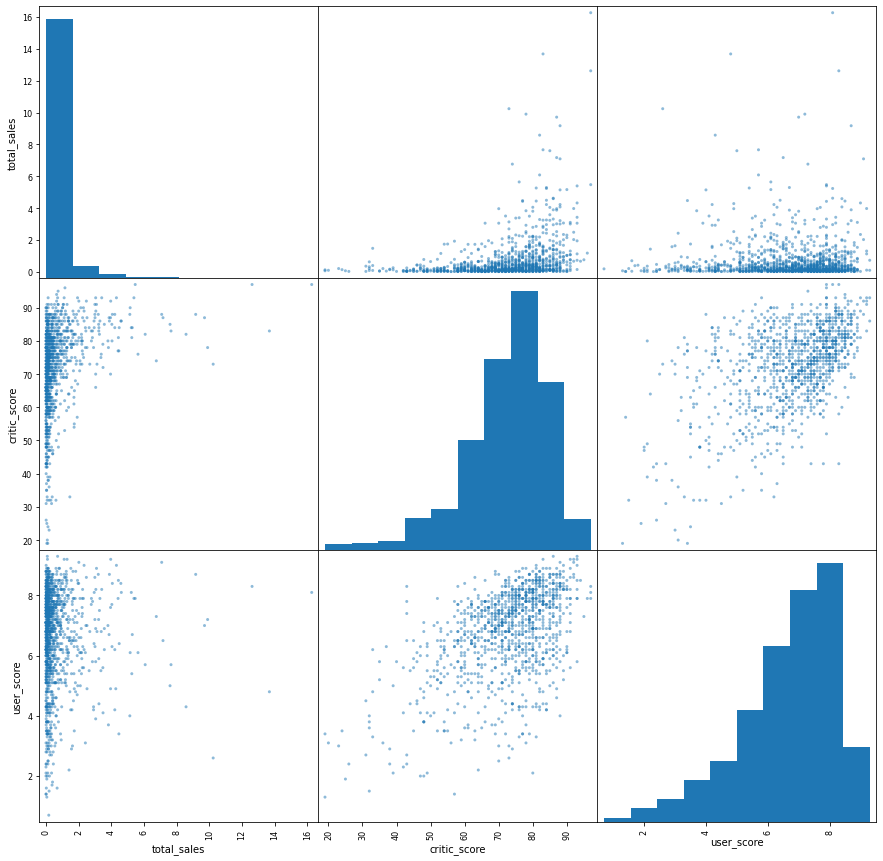

In [114]:
# building a scatter plot 
platforms_corr = new_data.query('platform != "PS3"')
platforms_corr = platforms_corr[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(platforms_corr, figsize=(15,15), grid=True);

,total_sales,critic_score,user_score
total_sales,1.000000,0.307792,0.010287
critic_score,0.307792,1.000000,0.512989
user_score,0.010287,0.512989,1.000000


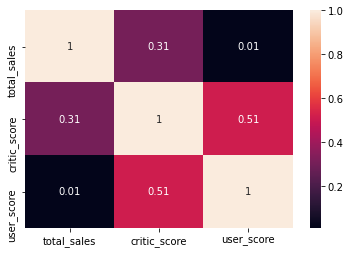

In [115]:
# calculating the correlation between reviews and sales
corrMatrix = platforms_corr.corr()
sn.heatmap(corrMatrix, annot=True)
platforms_corr.corr()

For other platforms the correlation is even lower. I suppose, because in our data most of the platforms are elder then PS3 and just a few consoles younger (when ratings can have impact on sales).

<a id='general-distribution-of-games'></a>

##### "Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?"

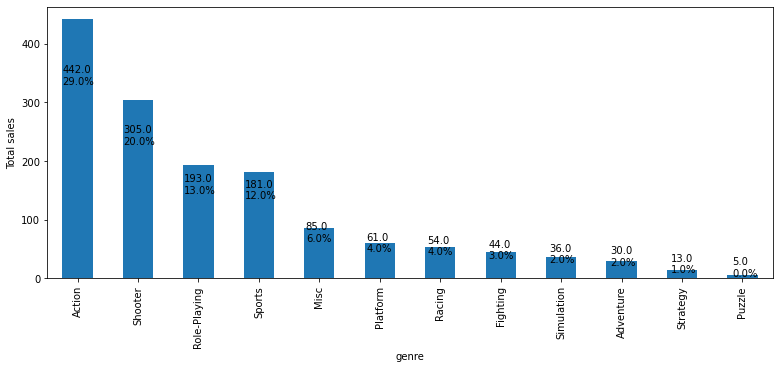

In [116]:
x = new_data.groupby(['genre']).sum().copy()
ax = x.total_sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

# creaing labels
ax.set(ylabel='Total sales')
for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() /15) )+ "%", 
                (p.get_x() * 1.007, p.get_height() * 0.75), 
                color='black')

Role-playing is on 3rd place instead of tail(so it recently became popular). Action and shooter genres are on top.  Puzzle, Adventure and Strategy are losers.<br>

<a id='top-five-platforms'></a>

#### "For each region (NA, EU, JP), determine the top five platforms. Describe variations in their market shares from region to region."

In [117]:
# North America
new_data.groupby('platform')['na_sales'].mean().sort_values(ascending=False).head()

platform
X360    0.479623
XOne    0.377004
Wii     0.323148
PS4     0.277398
WiiU    0.259184
Name: na_sales, dtype: float64

In [118]:
# Europe
new_data.groupby('platform')['eu_sales'].mean().sort_values(ascending=False).head()

platform
PS4     0.359923
X360    0.255205
Wii     0.220741
PS3     0.216755
XOne    0.208866
Name: eu_sales, dtype: float64

In [119]:
# Japan
new_data.groupby('platform')['jp_sales'].mean().sort_values(ascending=False)

platform
3DS     0.217426
DS      0.120000
WiiU    0.088503
PS3     0.071582
Wii     0.062778
PSP     0.060520
PSV     0.051238
PS4     0.040714
X360    0.005377
XOne    0.001377
PC      0.000000
Name: jp_sales, dtype: float64

In [120]:
#That's not in our task, but I also wanna take a look at it
new_data.groupby('platform')['other_sales'].mean().sort_values(ascending=False).head()

platform
PS4     0.123342
PS3     0.087748
X360    0.069863
XOne    0.057773
Wii     0.048333
Name: other_sales, dtype: float64

North Americans and Europeans have almost the same preferences, except WiiU vs PS3 respectively.<br>
Japanese differ in the choice of DS and 3DS of their own production (developed by Japan Nintendo). XBoxes by american Microsoft are on the last place.<br>

<a id='top-five-genres'></a>

#### "For each region (NA, EU, JP), determine The top five genres. Explain the difference."

In [121]:
# North America
new_data.groupby('genre')['na_sales'].mean().sort_values(ascending=False).head()

genre
Shooter     0.613602
Sports      0.303086
Platform    0.298588
Misc        0.198906
Fighting    0.181560
Name: na_sales, dtype: float64

In [122]:
# Europe
new_data.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).head()

genre
Shooter       0.480890
Sports        0.256840
Platform      0.251882
Racing        0.235259
Simulation    0.177439
Name: eu_sales, dtype: float64

In [123]:
# Japan
new_data.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).head()

genre
Role-Playing    0.176183
Simulation      0.126951
Platform        0.101529
Fighting        0.086606
Puzzle          0.076429
Name: jp_sales, dtype: float64

Platform genre is on 3rd place in every region. Further all countries have 2-3 common genres and about the same number of different. Only NA prefers Misc, only Europe Racing genre, and Japan has Role-Playing on the first place and Puzzle on the 5th which we remember has the last place in most profitable genres rating.<br>

<a id='ESRB-ratings'></a>

#### "Do ESRB ratings affect sales in individual regions(NA, EU, JP)?"

In [124]:
new_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum', margins=True)

,eu_sales,jp_sales,na_sales
rating,,,
E,113.05,28.33,114.49
E10+,55.56,8.19,75.96
M,193.96,21.20,231.57
T,53.01,26.09,66.31
All,415.58,83.81,488.33


In Europe and NA rating popularity are the same, but Japan as usual differs. I'll also look on correlation <br>


In [125]:
new_data.rating.value_counts()

M       498
T       414
E       397
E10+    308
Name: rating, dtype: int64

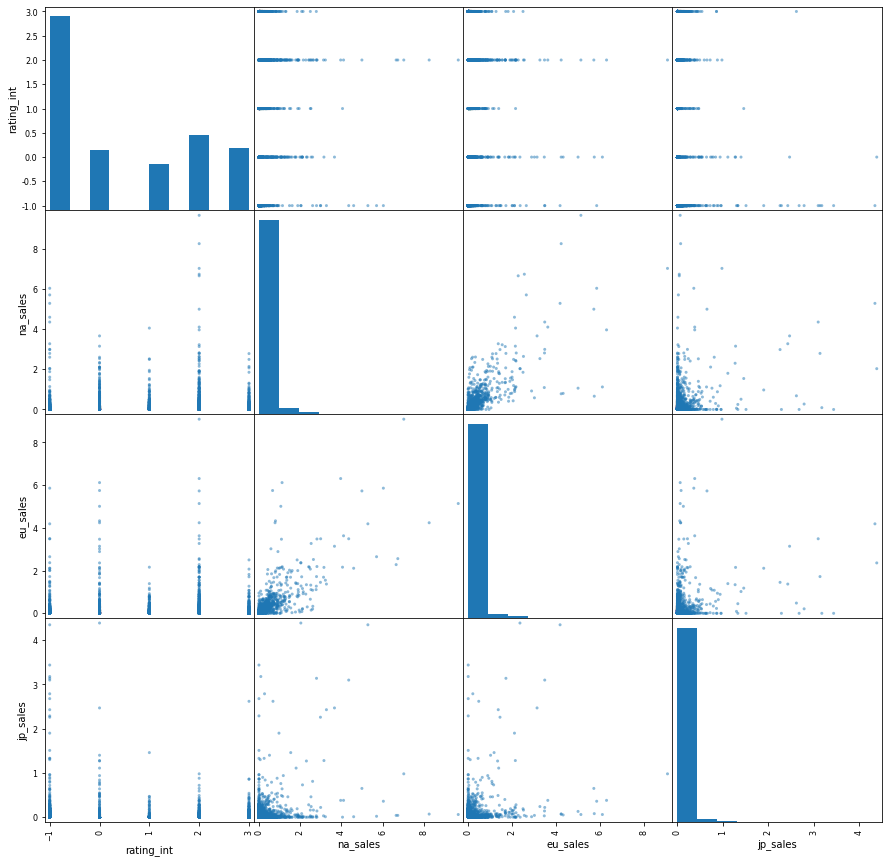

In [126]:
# creating numerical representation for categorical 'rating' column
new_data['rating_int'] = pd.Categorical(new_data.rating).codes
#choosing needed columns
rating_corr = new_data[['rating_int', 'na_sales', 'eu_sales', 'jp_sales']]

# plotting scatter_matrix
pd.plotting.scatter_matrix(rating_corr, figsize=(15,15), grid=True);

,rating_int,na_sales,eu_sales,jp_sales
rating_int,1.000000,0.150028,0.129547,-0.060441
na_sales,0.150028,1.000000,0.767475,0.271071
eu_sales,0.129547,0.767475,1.000000,0.265269
jp_sales,-0.060441,0.271071,0.265269,1.000000


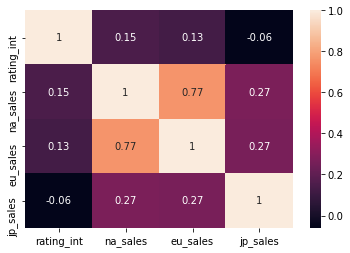

In [127]:
corrMatrix = rating_corr.corr()
sn.heatmap(corrMatrix, annot=True)
rating_corr.corr()

Now we can say for sure that there is absolutely no correlation between ESRB rating and sales.

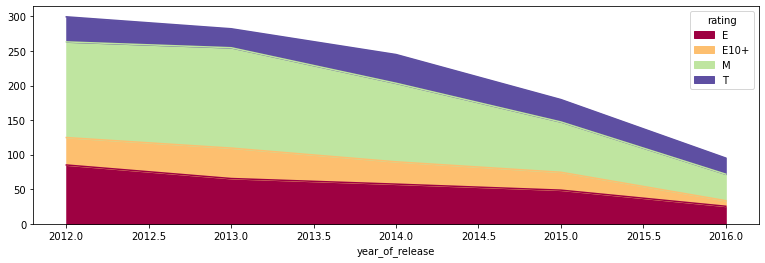

In [136]:
#Rating Sales Evolution just to practice new for me function
new_data.groupby(['year_of_release', 'rating']).total_sales.sum().unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(13, 4));

<a id='Average-user-ratings'></a>

#### "Test the following hypothesis Average user ratings of the Xbox One and PC platforms are the same."

1) Let's formulate hypothesis. Null hypothesis is always with equalty sign and alternative is opposite to H₀.<br>
null hypothesis H₀: The means user ratings of the XOne and PC platforms are equal to each other. M1 = M2<br>
alternative hypothesis H₁: The average user ratings of the Xbox One and PC platforms differs. M1 != M2<br>

2) We need a small but representative sample that reflects the features of the entire statistical population. The easiest way to ensure that this selection of data is representative is to take a random sample.<br>
I will use all data. And now we have to get rid off NaN.

In [129]:
# 1. getting rid off NaN in 'user_score' column  
new_data.dropna(subset=['user_score'], inplace=True)

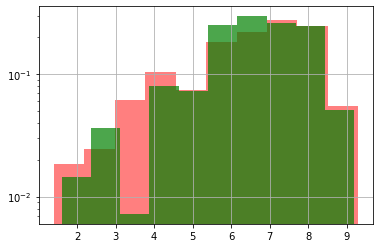

In [137]:
# 2. Checking distributions
new_data.loc[data.platform == 'PC', 'user_score'].hist(log=True, density=True, alpha=0.5, color='r');
new_data.loc[data.platform == 'XOne', 'user_score'].hist(log=True, density=True, alpha=0.7, color='g');

It looks like normal distribution with negative skew. I'll conduct t-test: methods of the scipy library make distribution normal automatically.

In [131]:
# 3. Appling Levene's test to check the variance equivalence and set 'median' parameter which is recommended for skewed distributions

from scipy.stats import levene
import random

#creating samles 
sample_1 = new_data.loc[data.platform == 'PC', 'user_score']
sample_2 = new_data.loc[data.platform == 'XOne', 'user_score']

stat, p = levene(sample_1, sample_2, center='median')
print('p-value:',p)
if (stat, p < .05):
        print("We will set equal_var=True")
else:
        print("We will set equal_var=False")

p-value: 0.01251484281850554
We will set equal_var=True


In [132]:
# 4. Conducting t-test

alpha = .05 # I choose commonly-accepted critical statistical significance level

results = st.ttest_ind(
        sample_1, 
        sample_2,
        equal_var = True)

print('p-value: ', results.pvalue)

# if the p-value is less than alpha, we reject the hypothesis
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.5535080500643661
We can't reject the null hypothesis


We have no reason to reject the null hypothesis. So the average user ratings of the Xbox One and PC platforms are equivalent.

<a id='Action-and-Sports-genres'></a>

#### "Test the following hypothesis - Average user ratings for the Action and Sports genres are different."

1) Formulating hypothesis:<br>
null hypothesis H₀: The means user ratings for the Action and Sports genres are equal to each other. M1 = M2<br>
alternative hypothesis H₁: The average user ratings for the Action and Sports genres are different. M1 != M2<br>

2) Again we will use all the rows.

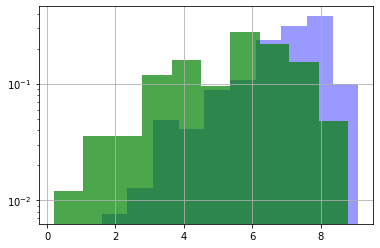

In [133]:
# 1. Checking distributions
new_data.loc[data.genre == 'Action', 'user_score'].hist(log=True, density=True, alpha=0.4, color='b')
new_data.loc[data.genre == 'Sports', 'user_score'].hist(log=True, density=True, alpha=0.7, color='g');

These distributions are even more scewed to the left. But again we'll perform t-test to check the equality of 2 population means.

In [134]:
# 2. Appling Levene's test 

#creating samles
sample_action = new_data.loc[data.genre == 'Action', 'user_score']
sample_sports = new_data.loc[data.genre == 'Sports', 'user_score']

stat, p = levene(sample_action, sample_sports, center='median')
print('p-value:',p)
if (stat, p < .05):
        print("We will set equal_var=True")
else:
        print("We will set equal_var=False")

p-value: 1.2353575419762759e-05
We will set equal_var=True


In [135]:
# 3. Conducting t-test

alpha = .05 # I choose commonly-accepted critical statistical significance level

results = st.ttest_ind(
        sample_action, 
        sample_sports,
        equal_var = True)

print('p-value: ', results.pvalue)

# if the p-value is less than alpha, we reject the hypothesis
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  3.517102771333629e-26
We reject the null hypothesis


The average user ratings for the Action and Sports genres are different.

<a id='conclusion'></a>

### Conclusion

The goal of our investigation was to identify patterns that determine whether a game succeeds or not in order to spot potential big winners and plan advertising campaigns for 2017 for our online store Ice. So here are our points:<br>
1. As we saw, platforms in general are popular for ~10 years. So we had to find platforms aproximately 4-5 years old before the peak of its popularity with a growing sales to predict potentially profitable platforms for 2017. They turned out to be X-box One and PS4. <br>
2. In terms of profitable game genres: almost half of sales (49%) is Action and Shooter genres. On the 3rd place role-playing games that Japanese prefer to play.<br>
3. At this point in time (2016), we have not found sufficient evidence that users and critic as well as ESRB ratings affect sales. 